In [1]:
import pandas as pd
from gensim import models,corpora
import pyLDAvis.gensim
from gensim.models.coherencemodel import CoherenceModel
import warnings

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [41]:
pd.set_option('max_colwidth',400)
pyLDAvis.enable_notebook()
warnings.filterwarnings('ignore')

In [42]:
Lda = models.LdaMulticore
lda_final =Lda.load('lda_final_9')
dictionary = corpora.Dictionary.load('dictionary')
doc_term_matrix = corpora.MmCorpus('corpus_9_b.mm')

#### Topics selected
* for each of the topics in this model, show the top 10 keywords that contribute the most to this topic
* for each keyword, show the weight which reflects how important that keyword is to the topic
* for example, we can see that Road is the most important keyword for Topic 0, wiht a weight of .0072

In [77]:
topics = lda_final.show_topics(num_topics=9,formatted=False,num_words=10)
topics


[(0,
  [('ontario', 0.013775034),
   ('heritage', 0.008604581),
   ('trust', 0.008331134),
   ('ontario heritage', 0.007961076),
   ('heritage trust', 0.007906088),
   ('trust plaque', 0.0078071095),
   ('west', 0.007470183),
   ('york', 0.007222533),
   ('park', 0.0068043857),
   ('north', 0.0067496616)]),
 (1,
  [('canada', 0.0077928277),
   ('canadian', 0.007764156),
   ('year', 0.0072197467),
   ('street', 0.0063954745),
   ('world', 0.005136756),
   ('heritage', 0.0045998595),
   ('open', 0.0045272703),
   ('north', 0.004442324),
   ('leaf', 0.0043863454),
   ('new', 0.0042968737)]),
 (2,
  [('canada', 0.010154526),
   ('york', 0.009010438),
   ('upper', 0.008275417),
   ('street', 0.00811053),
   ('bear', 0.007430742),
   ('upper canada', 0.0073632626),
   ('william', 0.0073603555),
   ('john', 0.0071869637),
   ('house', 0.007030418),
   ('society', 0.006919354)]),
 (3,
  [('corner', 0.013699297),
   ('area', 0.013036271),
   ('street', 0.013024991),
   ('yonge', 0.012431208),
 

#### Topic Coherence
* Following code is borrowed from : https://github.com/PacktPublishing/Hands-On-Machine-Learning-for-Algorithmic-Trading/blob/master/Chapter14/05_lda_with_gensim.ipynb
* top_topics: This orders the topics in the decreasing order of coherence score

In [45]:
coherence = lda_final.top_topics(doc_term_matrix,dictionary=dictionary,topn=10) # This orders the topics in the decreasing order of coherence score

In [46]:
coherence[0]

([(0.028153641, 'board canada'),
  (0.028150804, 'sites monuments'),
  (0.028147232, 'historic sites'),
  (0.028146956, 'monuments'),
  (0.028145345, 'monuments board'),
  (0.028144969, 'sites'),
  (0.028098943, 'historic'),
  (0.027096525, 'canada plaque'),
  (0.026882155, 'board'),
  (0.018982833, 'canada')],
 -0.03965316057032888)

In [47]:
num_topics = 9
topic_labels = ['Topic {}'.format(i) for i in range(1, num_topics+1)]

In [78]:
topic_coherence = []
topic_words = pd.DataFrame()
for t in range(len(coherence)):
    label = topic_labels[t]
    topic_coherence.append(coherence[t][1])
    df = pd.DataFrame(coherence[t][0], columns=[(label, 'prob'), (label, 'term')])
    df[(label, 'prob')] = df[(label, 'prob')].apply(lambda x: '{:.2%}'.format(x))
    topic_words = pd.concat([topic_words, df], axis=1)
                      
topic_words.columns = pd.MultiIndex.from_tuples(topic_words.columns)
pd.set_option('expand_frame_repr', False)
topic_words.head().to_csv('topic_words.csv', index=False)
topic_words.head(10)


Topic 1                  Topic 2                     Topic 3                   Topic 4                   Topic 5                 Topic 6               Topic 7               Topic 8               Topic 9          
     prob             term    prob                term    prob              term    prob              term    prob            term    prob          term    prob          term    prob          term    prob      term
0   2.82%     board canada   1.58%          historical   1.80%            design   1.38%           ontario   1.22%          street   1.39%        avenue   1.37%        corner   1.02%        canada   0.78%    canada
1   2.82%  sites monuments   1.37%              church   1.62%          heritage   0.86%          heritage   0.84%          canada   1.37%          city   1.30%          area   0.90%          york   0.78%  canadian
2   2.81%   historic sites   1.20%               board   1.61%          building   0.83%             trust   0.83%  toronto plaque   1.25%  city toronto   1.30%        street   0.83%         upper   0.72%      year
3   2.81%        monuments   1.14%    historical board   1.39%             style   0.80%  ontario heritage   0.82%        canadian   1.22%         clair   1.24%         yonge   0.81%        street   0.64%    street
4   2.81%  monuments board   1.12%        board plaque   1.38%  heritage toronto   0.79%    heritage trust   0.80%            work   1.22%      st clair   0.99%  yonge street   0.74%          bear   0.51%     world
5   2.81%            sites   1.08%  toronto historical   1.37%            street   0.78%      trust plaque   0.69%            city   1.17%  clair avenue   0.96%     community   0.74%  upper canada   0.46%  heritage
6   2.81%         historic   1.06%            building   1.35%    toronto plaque   0.75%              west   0.67%        building   1.15%          west   0.90%         build   0.74%       william   0.45%      open
7   2.71%    canada plaque   1.03%              street   1.14%         architect   0.72%              york   0.65%        heritage   1.12%          road   0.88%          city   0.72%          john   0.44%     north
8   2.69%            board   1.00%               build   0.94%              east   0.68%              park   0.64%            west   1.06%            st   0.83%          post   0.70%         house   0.44%      leaf
9   1.90%           canada   0.94%                site   0.85%            avenue   0.67%             north   0.63%            year   1.05%   avenue west   0.81%        avenue   0.69%       society   0.43%       new

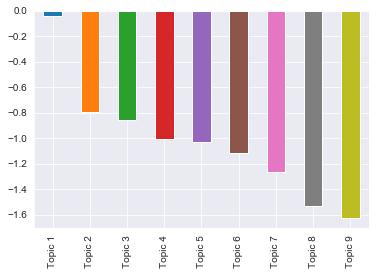

In [49]:
pd.Series(topic_coherence, index=topic_labels).plot.bar();

#### Another way to view the same information, taken from https://nbviewer.jupyter.org/github/smsubrahmannian/Topic-Modeling/blob/master/code/Intrepreting%20Topic%20model.ipynb

In [50]:
topic2topkeywords = {}
topic2csb = {}
topic2keywords = {}
topic2csa = {}
num_topics =lda_final.num_topics
cnt =1

for ws in coherence:
    wset = set(w[1] for w in ws[0])
    topic2topkeywords[cnt] = wset # set with top keywords for topic
    topic2csb[cnt] = ws[1] #avg coherence scores for each topic
    cnt +=1

for ws in topics:
    # create a unique set of keywords for each topic
    wset = set(w[0]for w in ws[1])
    topic2keywords[ws[0]+1] = wset
    
for i in range(1,num_topics+1):
    for j in range(1,num_topics+1):  
        if topic2keywords[i].intersection(topic2topkeywords[j])==topic2keywords[i]:
            topic2csa[i] = topic2csb[j]

finalData = pd.DataFrame([],columns=['Topic','words'])
finalData['Topic']=topic2keywords.keys()
finalData['Topic'] = finalData['Topic'].apply(lambda x: 'Topic'+str(x))
finalData['words']=topic2keywords.values()
finalData['cs'] = topic2csa.values()
finalData.sort_values(by='cs',ascending=False,inplace=True)
finalData

,Topic,words,cs
8,Topic9,"{board canada, historic sites, sites monuments, board, historic, monuments, monuments board, canada, sites, canada plaque}",-0.039653
4,Topic5,"{build, board plaque, street, toronto historical, church, board, site, building, historical, historical board}",-0.793553
5,Topic6,"{architect, street, heritage, avenue, heritage toronto, building, east, design, style, toronto plaque}",-0.862080
0,Topic1,"{west, york, heritage trust, ontario heritage, north, trust, heritage, park, ontario, trust plaque}",-1.010369
7,Topic8,"{west, street, city, work, heritage, canadian, building, year, canada, toronto plaque}",-1.030728
6,Topic7,"{clair, city toronto, st clair, west, city, clair avenue, st, avenue, road, avenue west}",-1.116229
3,Topic4,"{community, yonge street, street, build, corner, yonge, city, avenue, post, area}",-1.263380
2,Topic3,"{upper, society, bear, york, street, house, upper canada, canada, john, william}",-1.529236
1,Topic2,"{leaf, world, street, new, north, heritage, open, canadian, year, canada}",-1.623588


Text(0,0.5,'Average Coherence Score')

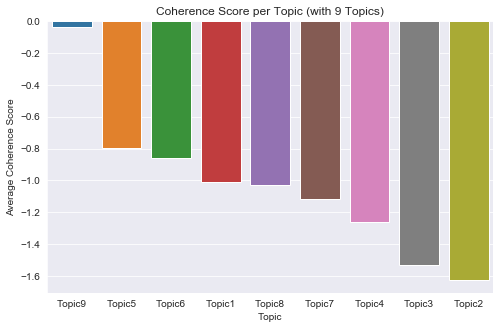

In [52]:

plt.figure(figsize=(8,5))
sns.barplot(data=finalData, x='Topic', y='cs')
plt.title('Coherence Score per Topic (with 9 Topics)')
plt.ylabel('Average Coherence Score')

### Visualize topics using pyLDAvis
* The spacing and size of each of the bubbles gives us an indication of the quality of our topic model. The best topic models have largish ubbles that don't overlap and that are spead out over the principal component dimensions
* hovering over a bubble shows the keywords for that topic, long with the overall frequency of that keyword within the corpus (blue) and the frequency within the current topic (red)
* The best topic models will have large bubbles that don’t overlap, showing a clear distinction between the topics identified. Mousing over each of the bubbles shows the keywords from each topic and their relative weighting.


In [53]:
num_topics =9
vis = pyLDAvis.gensim.prepare(lda_final, doc_term_matrix, dictionary,sort_topics=False)
pyLDAvis.save_html(vis,f'pyLDAvis_{num_topics}.html')
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.054464 -0.066477       1        1  16.020847
1     -0.026461 -0.074997       2        1  11.293733
2      0.013318  0.036115       3        1  10.665181
3      0.058699  0.120894       4        1   6.044124
4     -0.011777  0.138923       5        1  14.184797
5     -0.045514  0.070025       6        1  16.869982
6      0.172929 -0.117474       7        1   6.366613
7      0.004270 -0.019348       8        1  13.734664
8     -0.219928 -0.087662       9        1   4.820062, topic_info=     Category        Freq                Term       Total  loglift  logprob
term                                                                       
132   Default  269.000000               board  269.000000  30.0000  30.0000
145   Default  132.000000            historic  132.000000  29.0000  29.0000
133   Default   88.000000        board canada   88.000000  28.0000  28.0000
161   Default   88.000000     sites monuments   88.000000  27.0000  27.0000
151   Default   88.000000           monuments   88.000000  26.0000  26.0000
146   Default   88.000000      historic sites   88.000000  25.0000  25.0000
152   Default   88.000000     monuments board   88.000000  24.0000  24.0000
160   Default   88.000000               sites   88.000000  23.0000  23.0000
135   Default   91.000000       canada plaque   91.000000  22.0000  22.0000
628   Default  270.000000              design  270.000000  21.0000  21.0000
216   Default  289.000000      toronto plaque  289.000000  20.0000  20.0000
211   Default  177.000000               style  177.000000  19.0000  19.0000
97    Default  437.000000              canada  437.000000  18.0000  18.0000
299   Default  175.000000                area  175.000000  17.0000  17.0000
641   Default  179.000000              church  179.000000  16.0000  16.0000
193   Default  248.000000    heritage toronto  248.000000  15.0000  15.0000
477   Default   49.000000               clair   49.000000  14.0000  14.0000
480   Default   49.000000            st clair   49.000000  13.0000  13.0000
650   Default  154.000000        city toronto  154.000000  12.0000  12.0000
273   Default  239.000000          historical  239.000000  11.0000  11.0000
515   Default  310.000000                city  310.000000  10.0000  10.0000
478   Default   48.000000        clair avenue   48.000000   9.0000   9.0000
300   Default  352.000000              avenue  352.000000   8.0000   8.0000
220   Default  107.000000               yonge  107.000000   7.0000   7.0000
476   Default   68.000000         avenue west   68.000000   6.0000   6.0000
456   Default  139.000000    historical board  139.000000   5.0000   5.0000
445   Default  133.000000        board plaque  133.000000   4.0000   4.0000
623   Default  163.000000           architect  163.000000   3.0000   3.0000
98    Default  277.000000              corner  277.000000   2.0000   2.0000
473   Default  135.000000  toronto historical  135.000000   1.0000   1.0000
...       ...         ...                 ...         ...      ...      ...
1316   Topic9    4.205404             outdoor    9.467477   2.2209  -6.5851
1295   Topic9    4.739139             chapman   11.238117   2.1689  -6.4657
1363   Topic9    5.061357           gentleman   12.339575   2.1412  -6.3999
390    Topic9    7.082554             special   17.611864   2.1214  -6.0639
132    Topic9   81.877609               board  269.087708   1.8426  -3.6163
374    Topic9   13.104501               music   40.760410   1.8976  -5.4486
97     Topic9   57.817871              canada  437.123291   1.0095  -3.9642
176    Topic9   13.158115        bloor street   48.951752   1.7186  -5.4445
771    Topic9   10.440260            cultural   35.576180   1.8064  -5.6758
1501   Topic9   10.378173          queen park   37.057583   1.7596  -5.6818
351    Topic9   16.079340  university toronto   78.170021   1.4510  -5.2440
175    Topic9   13.

In [80]:
token_percent = vis.topic_coordinates.sort_values(by='topics').loc[:,['topics','Freq']]

In [81]:
token_percent

,topics,Freq
topic,,
0,1,16.020847
1,2,11.293733
2,3,10.665181
3,4,6.044124
4,5,14.184797
5,6,16.869982
6,7,6.366613
7,8,13.734664
8,9,4.820062


In [63]:
#vis.topic_info[vis.topic_info['Category']=='Topic1']

In [16]:
# from https://nbviewer.jupyter.org/github/smsubrahmannian/Topic-Modeling/blob/master/code/Intrepreting%20Topic%20model.ipynb
def get_relevant_words(vis,lam=0.3,topn=10):
    a = vis.topic_info
    a['finalscore'] = a['logprob']*lam+(1-lam)*a['loglift']
    a = a.loc[:,['Category','Term','finalscore']].groupby(['Category'])\
    .apply(lambda x: x.sort_values(by='finalscore',ascending=False).head(topn))
    a = a.loc[:,'Term'].reset_index().loc[:,['Category','Term']]
    a = a[a['Category']!='Default']
    a = a.to_dict('split')['data']
    d ={}
    for k,v in a: 
        if k not in d.keys():
            d[k] =set()
            d[k].add(v)
        else:
            d[k].add(v)
    finalData = pd.DataFrame([],columns=['Topic','words with Relevance'])
    finalData['Topic']=d.keys()
    finalData['words with Relevance']=d.values()
    return finalData

In [57]:
df_topics=get_relevant_words(vis,0.3).merge(finalData,how='left',on ='Topic').sort_values(by='cs',ascending=False).iloc[:,[0,1]]
df_topics

,Topic,words with Relevance
8,Topic9,"{board canada, historic sites, conservatory music, sites monuments, conservatory, historic, monuments, monuments board, sites, canada plaque}"
4,Topic5,"{scarborough historical, school, congregation, board plaque, toronto historical, scarborough, church, kingston road, historical, historical board}"
5,Topic6,"{architect, revival, revival style, window, heritage toronto, architectural, roof, design, style, toronto plaque}"
0,Topic1,"{humber, heritage trust, ontario heritage, trust, fort, lake, ontario, fort york, lake ontario, trust plaque}"
7,Topic8,"{harris, world, painting, tom, work, acclaim, academy, vision, building king, college}"
6,Topic7,"{clair, avenue west, westbound st, west transit, st clair, transit shelter, clair avenue, eastbound, transit, shelter}"
3,Topic4,"{improvement area, post office, yonge, early settler, north york, general store, city north, business improvement, lansing, corner yonge}"
2,Topic3,"{lyon mackenzie, mackenzie, justice, rebellion, jail, lyon, upper canada, reform, william lyon, elect}"
1,Topic2,"{leaf, maple leaf, maple, championship, sport, team, leaf gardens, fan, game, hockey}"


In [19]:
get_relevant_words(vis,0.3).merge(finalData,how='left',on ='Topic').sort_values(by='cs',ascending=False)

,Topic,words with Relevance,words,cs
8,Topic9,"{board canada, historic sites, conservatory music, sites monuments, conservatory, historic, monuments, monuments board, sites, canada plaque}","{board canada, historic sites, sites monuments, board, historic, monuments, monuments board, canada, sites, canada plaque}",-0.039653
4,Topic5,"{scarborough historical, school, congregation, board plaque, toronto historical, scarborough, church, kingston road, historical, historical board}","{build, board plaque, street, toronto historical, church, board, site, building, historical, historical board}",-0.793553
5,Topic6,"{architect, revival, revival style, window, heritage toronto, architectural, roof, design, style, toronto plaque}","{architect, street, heritage, avenue, heritage toronto, building, east, design, style, toronto plaque}",-0.862080
0,Topic1,"{humber, heritage trust, ontario heritage, trust, fort, lake, ontario, fort york, lake ontario, trust plaque}","{west, york, heritage trust, ontario heritage, north, trust, heritage, park, ontario, trust plaque}",-1.010369
7,Topic8,"{harris, world, painting, tom, work, acclaim, academy, vision, building king, college}","{west, street, city, work, heritage, canadian, building, year, canada, toronto plaque}",-1.030728
6,Topic7,"{clair, avenue west, westbound st, west transit, st clair, transit shelter, clair avenue, eastbound, transit, shelter}","{clair, city toronto, st clair, west, city, clair avenue, st, avenue, road, avenue west}",-1.116229
3,Topic4,"{improvement area, post office, yonge, early settler, north york, general store, city north, business improvement, lansing, corner yonge}","{community, yonge street, street, build, corner, yonge, city, avenue, post, area}",-1.263380
2,Topic3,"{lyon mackenzie, mackenzie, justice, rebellion, jail, lyon, upper canada, reform, william lyon, elect}","{upper, society, bear, york, street, house, upper canada, canada, john, william}",-1.529236
1,Topic2,"{leaf, maple leaf, maple, championship, sport, team, leaf gardens, fan, game, hockey}","{leaf, world, street, new, north, heritage, open, canadian, year, canada}",-1.623588


In [59]:
subjects=['Historical sites', 'Scarborough / Religion', 'Architecture', 'Waterways / Fort York', 'Art / Eduction', 'Transit', 'Business', '1837 rebellion / Justice', 'Maple Leaf / Hockey']

In [60]:
df_topics['Subject'] = subjects
df_topics

,Topic,words with Relevance,Subject
8,Topic9,"{board canada, historic sites, conservatory music, sites monuments, conservatory, historic, monuments, monuments board, sites, canada plaque}",Historical sites
4,Topic5,"{scarborough historical, school, congregation, board plaque, toronto historical, scarborough, church, kingston road, historical, historical board}",Scarborough / Religion
5,Topic6,"{architect, revival, revival style, window, heritage toronto, architectural, roof, design, style, toronto plaque}",Architecture
0,Topic1,"{humber, heritage trust, ontario heritage, trust, fort, lake, ontario, fort york, lake ontario, trust plaque}",Waterways / Fort York
7,Topic8,"{harris, world, painting, tom, work, acclaim, academy, vision, building king, college}",Art / Eduction
6,Topic7,"{clair, avenue west, westbound st, west transit, st clair, transit shelter, clair avenue, eastbound, transit, shelter}",Transit
3,Topic4,"{improvement area, post office, yonge, early settler, north york, general store, city north, business improvement, lansing, corner yonge}",Business
2,Topic3,"{lyon mackenzie, mackenzie, justice, rebellion, jail, lyon, upper canada, reform, william lyon, elect}",1837 rebellion
1,Topic2,"{leaf, maple leaf, maple, championship, sport, team, leaf gardens, fan, game, hockey}",Maple Leaf / Hockey


In [ ]:
# lda_final =Lda.load('lda_final_9')
# dictionary = corpora.Dictionary.load('dictionary')
# doc_term_matrix = corpora.MmCorpus('corpus_9_b.mm')

In [79]:
df_topics

,Topic,words with Relevance,Subject
8,Topic9,"{board canada, historic sites, conservatory music, sites monuments, conservatory, historic, monuments, monuments board, sites, canada plaque}",Historical sites
4,Topic5,"{scarborough historical, school, congregation, board plaque, toronto historical, scarborough, church, kingston road, historical, historical board}",Scarborough / Religion
5,Topic6,"{architect, revival, revival style, window, heritage toronto, architectural, roof, design, style, toronto plaque}",Architecture
0,Topic1,"{humber, heritage trust, ontario heritage, trust, fort, lake, ontario, fort york, lake ontario, trust plaque}",Waterways / Fort York
7,Topic8,"{harris, world, painting, tom, work, acclaim, academy, vision, building king, college}",Art / Eduction
6,Topic7,"{clair, avenue west, westbound st, west transit, st clair, transit shelter, clair avenue, eastbound, transit, shelter}",Transit
3,Topic4,"{improvement area, post office, yonge, early settler, north york, general store, city north, business improvement, lansing, corner yonge}",Business
2,Topic3,"{lyon mackenzie, mackenzie, justice, rebellion, jail, lyon, upper canada, reform, william lyon, elect}",1837 rebellion
1,Topic2,"{leaf, maple leaf, maple, championship, sport, team, leaf gardens, fan, game, hockey}",Maple Leaf / Hockey
